# Hands-on Lab --- Data Prep

## Importing packages:

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 2)

## Reading comma separated files into dataframes.
## Change the path below to point to churn and margin data:

In [2]:
churn_df = pd.read_csv(r'C:\Users\dangt\Desktop\Trinh Phan\OSU Lesson\Fall 2020\Customer Life Time Value\Group Project\TP_churn_data.csv')
margin_df = pd.read_csv(r'C:\Users\dangt\Desktop\Trinh Phan\OSU Lesson\Fall 2020\Customer Life Time Value\Group Project\TP_margin_data.csv')
demog_df = pd.read_csv(r'C:\Users\dangt\Desktop\Trinh Phan\OSU Lesson\Fall 2020\Customer Life Time Value\Group Project\TP_demog_dataprep.csv')

## Use the head method to view churn dataframe:

In [3]:
churn_df.head()

,ST,Zip,DMA,Area_Cd,emailable,solicit_ph_ind,solicit_email_ind,fixd_incm_flg,scheduled_purchase_flg,months_since_last_trans,months_since_first_trans,purch_cnt_life,purch_amt_life,purch_cnt_cc_36mo,purch_cnt_et_36mo,purch_cnt_ck_36mo,purch_cnt_tt_36mo,purch_amt_36mo,purch_avg_36mo,purch_avg_interval,mail_cnt_36mo,resp_cnt_36mo,call_in_mo_36mo,call_out_mo_36mo,order_cnt_36mo,tier,tier_prev,acct_ID,activation_date,event_date,churn_year_plus1_ind
0,SC,29607,567,864,1,1,1,0,0,3,21,5,145.0,4,0,1,5,145.0,29.00,4.50,5,0,0,1,1,1-Bronze,xxx,I148760611,30NOV12,31MAY15,1
1,MO,63901,632,573,1,1,1,0,0,9,9,1,20.0,0,0,1,1,20.0,20.00,-1.00,1,0,1,0,1,1-Bronze,xxx,I151076142,29NOV13,29NOV14,1
2,IL,60456,602,missing,0,1,1,0,0,1,167,102,2890.0,0,0,17,17,600.0,35.29,3.07,17,2,0,0,4,1-Bronze,xxx,I27001315,05OCT00,NaN,0
3,FL,34698,539,727,1,1,1,0,0,9,13,5,420.0,5,0,0,5,420.0,84.00,1.00,5,0,1,1,3,3-Gold,xxx,I150064127,31JUL13,29NOV14,1
4,CA,92084,825,760,0,1,1,0,0,1,2,2,120.0,1,0,1,2,120.0,60.00,1.00,2,0,0,0,2,1-Bronze,xxx,I152631565,30JUN14,NaN,0


## Use pandas describe method to see variable stats,
##    and transpose to show variables as a list:

In [5]:
print(" summary stats on churn data ") 
print(churn_df.describe(include='all').transpose())

 summary stats on churn data 
                            count  unique         top    freq     mean      std  min      25%      50%      75%      max
ST                         240368      61          TX   21633      NaN      NaN  NaN      NaN      NaN      NaN      NaN
Zip                        240368   26124     missing     894      NaN      NaN  NaN      NaN      NaN      NaN      NaN
DMA                        240368     216         803    9721      NaN      NaN  NaN      NaN      NaN      NaN      NaN
Area_Cd                    240368     384     missing   13090      NaN      NaN  NaN      NaN      NaN      NaN      NaN
emailable                 2.4e+05     NaN         NaN     NaN     0.51      0.5    0        0        1        1        1
solicit_ph_ind            2.4e+05     NaN         NaN     NaN     0.89     0.31    0        1        1        1        1
solicit_email_ind         2.4e+05     NaN         NaN     NaN     0.96     0.19    0        1        1        1        1
fi

## Use head method to view margin dataframe:

In [6]:
margin_df.head()

,trans_amt_t_minus_00,trans_amt_t_minus_01,trans_amt_t_minus_02,trans_amt_t_minus_03,trans_amt_t_minus_04,trans_amt_t_minus_05,trans_amt_t_minus_06,trans_amt_t_minus_07,trans_amt_t_minus_08,trans_amt_t_minus_09,trans_amt_t_minus_10,trans_amt_t_minus_11,trans_amt_t_minus_12,trans_amt_t_minus_13,trans_amt_t_minus_14,trans_amt_t_minus_15,trans_amt_t_minus_16,trans_amt_t_minus_17,trans_amt_t_minus_18,trans_amt_t_minus_19,trans_amt_t_minus_20,trans_amt_t_minus_21,trans_amt_t_minus_22,trans_amt_t_minus_23,trans_amt_t_minus_24,...,cost_amt_t_minus_11,cost_amt_t_minus_10,cost_amt_t_minus_09,cost_amt_t_minus_08,cost_amt_t_minus_07,cost_amt_t_minus_06,cost_amt_t_minus_05,cost_amt_t_minus_04,cost_amt_t_minus_03,cost_amt_t_minus_02,cost_amt_t_minus_01,cost_amt_t_minus_00,cost_amt_t_plus_01,cost_amt_t_plus_02,cost_amt_t_plus_03,cost_amt_t_plus_04,cost_amt_t_plus_05,cost_amt_t_plus_06,cost_amt_t_plus_07,cost_amt_t_plus_08,cost_amt_t_plus_09,cost_amt_t_plus_10,cost_amt_t_plus_11,cost_amt_t_plus_12,acct_ID
0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,50.0,0.0,40.0,0.0,20.0,0.0,0.0,0.0,0.0,...,0.00,0.56,0.24,0.56,0.29,0.23,0.52,0.80,2.41,2.71,0.82,0.64,1.76,0.60,1.69,0.30,0.82,0.30,0.82,0.00,0.56,0.00,1.09,0.56,I148760611
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,12.48,1.33,0.00,0.00,0.52,0.80,0.00,0.26,0.52,0.00,0.82,0.00,0.79,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,I151076142
2,25.0,0.0,0.0,50.0,30.0,0.0,60.0,30.0,0.0,140.0,0.0,25.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,35.0,0.0,...,1.07,0.56,4.83,0.48,1.07,2.37,0.00,1.87,1.37,2.65,0.26,1.37,1.89,1.37,1.69,1.37,0.82,1.07,1.59,1.07,1.93,3.41,1.59,1.93,I27001315
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,84.0,84.0,84.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.70,5.16,3.29,1.80,0.94,0.94,4.95,0.80,0.30,2.91,0.26,0.84,1.72,0.30,0.00,0.00,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.30,I150064127
4,20.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.79,1.07,1.67,2.14,1.99,1.37,0.82,0.60,1.42,0.00,0.56,0.56,2.60,0.86,I152631565


## Modify margin data to only have ANNUAL margin numbers,
##    and print stats on the new margin dataframe:

In [7]:
margin_df['rev_Y_neg_1']=margin_df['trans_amt_t_minus_00']+margin_df['trans_amt_t_minus_01']+margin_df['trans_amt_t_minus_02']+margin_df['trans_amt_t_minus_03']+margin_df['trans_amt_t_minus_04']+margin_df['trans_amt_t_minus_05']+margin_df['trans_amt_t_minus_06']+margin_df['trans_amt_t_minus_07']+margin_df['trans_amt_t_minus_08']+margin_df['trans_amt_t_minus_09']+margin_df['trans_amt_t_minus_10']+margin_df['trans_amt_t_minus_11']
margin_df['cost_Y_neg_1']=margin_df['cost_amt_t_minus_00']+margin_df['cost_amt_t_minus_01']+margin_df['cost_amt_t_minus_02']+margin_df['cost_amt_t_minus_03']+margin_df['cost_amt_t_minus_04']+margin_df['cost_amt_t_minus_05']+margin_df['cost_amt_t_minus_06']+margin_df['cost_amt_t_minus_07']+margin_df['cost_amt_t_minus_08']+margin_df['cost_amt_t_minus_09']+margin_df['cost_amt_t_minus_10']+margin_df['cost_amt_t_minus_11']
margin_df['margin_Y_neg_1']=margin_df['rev_Y_neg_1']-margin_df['cost_Y_neg_1']

margin_df['rev_Y_neg_2']=margin_df['trans_amt_t_minus_12']+margin_df['trans_amt_t_minus_13']+margin_df['trans_amt_t_minus_14']+margin_df['trans_amt_t_minus_15']+margin_df['trans_amt_t_minus_16']+margin_df['trans_amt_t_minus_17']+margin_df['trans_amt_t_minus_18']+margin_df['trans_amt_t_minus_19']+margin_df['trans_amt_t_minus_20']+margin_df['trans_amt_t_minus_21']+margin_df['trans_amt_t_minus_22']+margin_df['trans_amt_t_minus_23']
margin_df['cost_Y_neg_2']=margin_df['cost_amt_t_minus_12']+margin_df['cost_amt_t_minus_13']+margin_df['cost_amt_t_minus_14']+margin_df['cost_amt_t_minus_15']+margin_df['cost_amt_t_minus_16']+margin_df['cost_amt_t_minus_17']+margin_df['cost_amt_t_minus_18']+margin_df['cost_amt_t_minus_19']+margin_df['cost_amt_t_minus_20']+margin_df['cost_amt_t_minus_21']+margin_df['cost_amt_t_minus_22']+margin_df['cost_amt_t_minus_23']
margin_df['margin_Y_neg_2']=margin_df['rev_Y_neg_2']-margin_df['cost_Y_neg_2']

margin_df['rev_Y_neg_3']=margin_df['trans_amt_t_minus_24']+margin_df['trans_amt_t_minus_25']+margin_df['trans_amt_t_minus_26']+margin_df['trans_amt_t_minus_27']+margin_df['trans_amt_t_minus_28']+margin_df['trans_amt_t_minus_29']+margin_df['trans_amt_t_minus_30']+margin_df['trans_amt_t_minus_31']+margin_df['trans_amt_t_minus_32']+margin_df['trans_amt_t_minus_33']+margin_df['trans_amt_t_minus_34']+margin_df['trans_amt_t_minus_35']
margin_df['cost_Y_neg_3']=margin_df['cost_amt_t_minus_24']+margin_df['cost_amt_t_minus_25']+margin_df['cost_amt_t_minus_26']+margin_df['cost_amt_t_minus_27']+margin_df['cost_amt_t_minus_28']+margin_df['cost_amt_t_minus_29']+margin_df['cost_amt_t_minus_30']+margin_df['cost_amt_t_minus_31']+margin_df['cost_amt_t_minus_32']+margin_df['cost_amt_t_minus_33']+margin_df['cost_amt_t_minus_34']+margin_df['cost_amt_t_minus_35']
margin_df['margin_Y_neg_3']=margin_df['rev_Y_neg_3']-margin_df['cost_Y_neg_3']

margin_df['rev_Y_pos_1']=margin_df['trans_amt_t_plus_01']+margin_df['trans_amt_t_plus_02']+margin_df['trans_amt_t_plus_03']+margin_df['trans_amt_t_plus_04']+margin_df['trans_amt_t_plus_05']+margin_df['trans_amt_t_plus_06']+margin_df['trans_amt_t_plus_07']+margin_df['trans_amt_t_plus_08']+margin_df['trans_amt_t_plus_09']+margin_df['trans_amt_t_plus_10']+margin_df['trans_amt_t_plus_11']+margin_df['trans_amt_t_plus_12']
margin_df['cost_Y_pos_1']=margin_df['cost_amt_t_plus_01']+margin_df['cost_amt_t_plus_02']+margin_df['cost_amt_t_plus_03']+margin_df['cost_amt_t_plus_04']+margin_df['cost_amt_t_plus_05']+margin_df['cost_amt_t_plus_06']+margin_df['cost_amt_t_plus_07']+margin_df['cost_amt_t_plus_08']+margin_df['cost_amt_t_plus_09']+margin_df['cost_amt_t_plus_10']+margin_df['cost_amt_t_plus_11']+margin_df['cost_amt_t_plus_12']
margin_df['margin_Y_pos_1']=margin_df['rev_Y_pos_1']-margin_df['cost_Y_pos_1']

margin_df = margin_df[['acct_ID','margin_Y_neg_1','margin_Y_neg_2','margin_Y_neg_3','margin_Y_pos_1']]

print(" summary stats on margin data ") 
print(margin_df.describe(include='all').transpose())

 summary stats on margin data 
                  count  unique         top freq     mean      std      min  25%      50%      75%      max
acct_ID          240368  239356  I152106951    3      NaN      NaN      NaN  NaN      NaN      NaN      NaN
margin_Y_neg_1  2.4e+05     NaN         NaN  NaN  2.2e+02  1.5e+03 -1.5e+04   42  1.8e+02  3.4e+02  2.8e+05
margin_Y_neg_2  2.4e+05     NaN         NaN  NaN  1.9e+02  1.9e+03 -2.1e+04    0  1.3e+02  2.9e+02  4.7e+05
margin_Y_neg_3  2.4e+05     NaN         NaN  NaN  1.7e+02  2.1e+03 -7.5e+03    0       28  2.5e+02  4.9e+05
margin_Y_pos_1  2.4e+05     NaN         NaN  NaN  3.5e+02  2.1e+03 -3.5e+03 -2.2  1.6e+02  3.3e+02    4e+05


In [8]:
margin_df.head()

,acct_ID,margin_Y_neg_1,margin_Y_neg_2,margin_Y_neg_3,margin_Y_pos_1
0,I148760611,5.22,112.05,0.00,-8.50
1,I151076142,4.09,0.00,0.00,-1.87
2,I27001315,342.10,81.59,113.92,340.27
3,I150064127,311.11,74.41,0.00,-2.62
4,I152631565,115.14,0.00,0.00,105.41


## Create bar chart to explore churn rates by tiers:

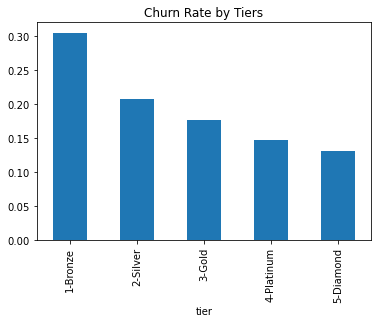

In [9]:
temp_df = churn_df.groupby(['tier'])['churn_year_plus1_ind'].mean()
temp_df.plot.bar(title="Churn Rate by Tiers")

## Create histogram to explore distribution of variables in churn data:

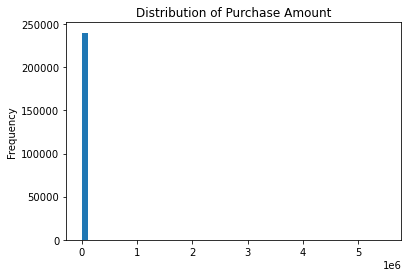

In [10]:
churn_df['purch_amt_life'].plot.hist(title="Distribution of Purchase Amount",bins=50)

## Create histogram to explore distribution of variables in margin data:

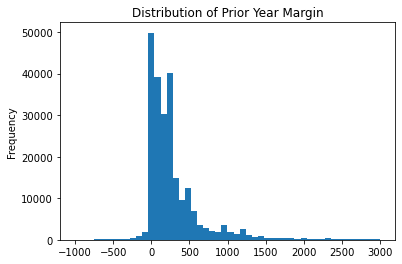

In [11]:
temp_df = margin_df.query('-1000<margin_Y_neg_1<3000')
temp_df['margin_Y_neg_1'].plot.hist(title="Distribution of Prior Year Margin",bins=50)

## Feature engineering on the Churn data:

In [12]:
""" when avg interval = -1 replace with 36 months """
churn_df['purch_avg_interval'].replace([-1], 36, inplace=True)

""" when avg purchase = -1 replace with 0 """
churn_df['purch_avg_36mo'].replace([-1], 0, inplace=True)

churn_df['log_order_cnt_36mo']=np.log10(churn_df['order_cnt_36mo']+1)
churn_df['log_purch_amt_36mo']=np.log10(churn_df['purch_amt_36mo']+1)
churn_df['log_purch_amt_life']=np.log10(churn_df['purch_amt_life']+1)
churn_df['log_purch_avg_36mo']=np.log10(churn_df['purch_avg_36mo']+1)
churn_df['log_purch_cnt_life']=np.log10(churn_df['purch_cnt_life']+1)
churn_df['log_purch_cnt_tt_36mo']=np.log10(churn_df['purch_cnt_tt_36mo']+1)
churn_df['log_resp_cnt_36mo']=np.log10(churn_df['resp_cnt_36mo']+1)

churn_df['perc_purch_cc_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_cc_36mo']/churn_df['purch_cnt_tt_36mo'])
churn_df['perc_purch_ck_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_ck_36mo']/churn_df['purch_cnt_tt_36mo'])
churn_df['perc_purch_et_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_et_36mo']/churn_df['purch_cnt_tt_36mo'])

churn_df = churn_df.drop(['order_cnt_36mo','purch_amt_36mo','purch_amt_life','purch_avg_36mo','purch_cnt_life',
                          'purch_cnt_tt_36mo','resp_cnt_36mo',
                          'purch_cnt_cc_36mo','purch_cnt_ck_36mo','purch_cnt_et_36mo'],axis=1)

print(" summary stats on churn data ") 
print(churn_df.describe(include='all').transpose())

 summary stats on churn data 
                            count  unique         top    freq   mean   std  min   25%   50%      75%      max
ST                         240368      61          TX   21633    NaN   NaN  NaN   NaN   NaN      NaN      NaN
Zip                        240368   26124     missing     894    NaN   NaN  NaN   NaN   NaN      NaN      NaN
DMA                        240368     216         803    9721    NaN   NaN  NaN   NaN   NaN      NaN      NaN
Area_Cd                    240368     384     missing   13090    NaN   NaN  NaN   NaN   NaN      NaN      NaN
emailable                 2.4e+05     NaN         NaN     NaN   0.51   0.5    0     0     1        1        1
solicit_ph_ind            2.4e+05     NaN         NaN     NaN   0.89  0.31    0     1     1        1        1
solicit_email_ind         2.4e+05     NaN         NaN     NaN   0.96  0.19    0     1     1        1        1
fixd_incm_flg             2.4e+05     NaN         NaN     NaN  0.092  0.29    0     0     

## histogram plot on new log variable in Churn data

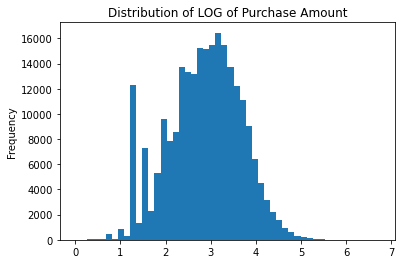

In [13]:
churn_df['log_purch_amt_life'].plot.hist(title="Distribution of LOG of Purchase Amount",bins=50)

## Feature engineering on margin data, while keeping original variables.
## Using logs with an offset that will account for very large negative margins:

In [14]:
margin_df['margin_3yr_avg']=(margin_df['margin_Y_neg_1']+margin_df['margin_Y_neg_2']+margin_df['margin_Y_neg_3'])/3
margin_df['log_margin_Y_neg_1']=np.log10(margin_df['margin_Y_neg_1']+50000)
margin_df['log_margin_Y_neg_2']=np.log10(margin_df['margin_Y_neg_2']+50000)
margin_df['log_margin_Y_neg_3']=np.log10(margin_df['margin_Y_neg_3']+50000)
margin_df['log_margin_3yr_avg']=np.log10(margin_df['margin_3yr_avg']+50000)
margin_df['log_margin_Y_pos_1']=np.log10(margin_df['margin_Y_pos_1']+50000)

## Histogram on transformed target for Margin data

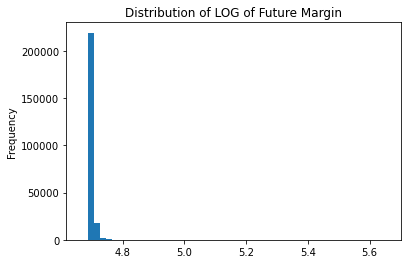

In [15]:
margin_df['log_margin_Y_pos_1'].plot.hist(title="Distribution of LOG of Future Margin",bins=50)

## Scatter plot on Future Margin vs Prior Margin (logarithms):

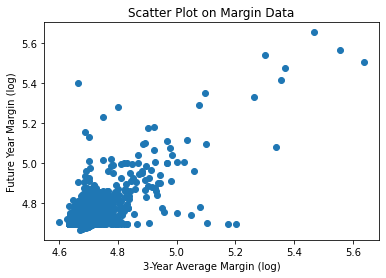

In [16]:
plt.scatter(margin_df['log_margin_3yr_avg'], margin_df['log_margin_Y_pos_1'])
plt.xlabel("3-Year Average Margin (log)")
plt.ylabel("Future Year Margin (log)")
plt.title("Scatter Plot on Margin Data")
print(" ") 
plt.show()

## Eliminating duplicate acct_IDs before joining data:

In [17]:
churn_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
churn_df.shape

(239356, 31)

In [18]:
margin_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
margin_df.shape

(239356, 11)

In [19]:
demog_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
demog_df.shape

(239356, 11)

## Join Churn and Margin data by acct_ID:

In [20]:
combined = pd.merge(churn_df, margin_df, on='acct_ID', how='inner')
combined.shape

(239356, 41)

In [21]:
combined_df = pd.merge(combined, demog_df, on='acct_ID', how='inner')
combined_df.shape

(239356, 51)

## Create dummy variables for certain categorical variables.

In [22]:
""" WARNING: this commented-out approach would create dummy indicators for all """
"""    categorical variables, including those with very high cardinality, such as zip codes """
"""    and also would drop the original categorical variables and only keep the dummy indicators """

""" combined_df = pd.get_dummies(combined_df) """

""" this approach hand-picks only certain variables for which to create dummy indicators """
""" and keeps the original variables too """

for column in ['ST','demog_LOR', 'demog_ownrent', 'tier', 'tier_prev']:
    dummies = pd.get_dummies(combined_df[column],prefix=column)
    combined_df[dummies.columns] = dummies

print(" ") 
print("Columns in new data")
print(" ") 
print(combined_df.dtypes)

KeyError: 'demog_LOR'

In [27]:
print(" ") 
print("New dataset with dummies") 
print(" ") 
combined_df.head(10)

 
New dataset with dummies
 


,ST,Zip,DMA,Area_Cd,emailable,solicit_ph_ind,solicit_email_ind,fixd_incm_flg,scheduled_purchase_flg,months_since_last_trans,months_since_first_trans,purch_avg_interval,mail_cnt_36mo,call_in_mo_36mo,call_out_mo_36mo,tier,tier_prev,acct_ID,activation_date,event_date,churn_year_plus1_ind,log_order_cnt_36mo,log_purch_amt_36mo,log_purch_amt_life,log_purch_avg_36mo,...,ST_VT,ST_WA,ST_WI,ST_WV,ST_WY,ST_missing,demog_LOR_00 to 05 years,demog_LOR_06 to 10 years,demog_LOR_11 to 19 years,demog_LOR_20+ years,demog_ownrent_Definite Owner,demog_ownrent_Definite Renter,demog_ownrent_Probable Owner,demog_ownrent_Probable Renter,tier_1-Bronze,tier_2-Silver,tier_3-Gold,tier_4-Platinum,tier_5-Diamond,tier_prev_1-Bronze,tier_prev_2-Silver,tier_prev_3-Gold,tier_prev_4-Platinum,tier_prev_5-Diamond,tier_prev_xxx
0,SC,29607,567,864,1,1,1,0,0,3,21,4.50,5,0,1,1-Bronze,xxx,I148760611,30NOV12,31MAY15,1,0.30,2.16,2.16,1.48,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,MO,63901,632,573,1,1,1,0,0,9,9,36.00,1,1,0,1-Bronze,xxx,I151076142,29NOV13,29NOV14,1,0.30,1.32,1.32,1.32,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,IL,60456,602,missing,0,1,1,0,0,1,167,3.07,17,0,0,1-Bronze,xxx,I27001315,05OCT00,NaN,0,0.70,2.78,3.46,1.56,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,FL,34698,539,727,1,1,1,0,0,9,13,1.00,5,1,1,3-Gold,xxx,I150064127,31JUL13,29NOV14,1,0.60,2.62,2.62,1.93,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,CA,92084,825,760,0,1,1,0,0,1,2,1.00,2,0,0,1-Bronze,xxx,I152631565,30JUN14,NaN,0,0.48,2.08,2.08,1.79,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,MI,48446,505,810,1,0,1,0,0,11,128,1.58,4,0,3,1-Bronze,2-Silver,H62972005,04JAN04,30SEP14,1,0.78,2.49,3.30,1.89,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
6,AL,35020,630,205,0,1,1,0,0,5,10,1.00,6,0,0,1-Bronze,xxx,I151044258,30OCT13,31MAR15,1,0.30,2.08,2.08,1.32,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7,PR,missing,998,missing,0,1,1,0,1,1,121,2.07,30,0,0,1-Bronze,xxx,I95584028,04AUG04,NaN,0,0.48,2.78,3.08,1.32,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
8,AZ,85232,753,520,1,1,1,0,1,1,120,19.83,4,0,0,3-Gold,1-Bronze,I106802847,03SEP04,NaN,0,0.48,1.91,2.42,1.32,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
9,CA,95691,862,916,1,1,1,0,0,12,15,1.00,4,1,2,1-Bronze,xxx,I149698399,31MAY13,30AUG14,1,0.48,1.96,1.96,1.37,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [33]:
combined_df.isnull().sum()

ST                                    0
Zip                                   0
DMA                                   0
Area_Cd                               0
emailable                             0
solicit_ph_ind                        0
solicit_email_ind                     0
fixd_incm_flg                         0
scheduled_purchase_flg                0
months_since_last_trans               0
months_since_first_trans              0
purch_avg_interval                    0
mail_cnt_36mo                         0
call_in_mo_36mo                       0
call_out_mo_36mo                      0
tier                                  0
tier_prev                             0
acct_ID                               0
activation_date                       0
event_date                       176267
churn_year_plus1_ind                  0
log_order_cnt_36mo                    0
log_purch_amt_36mo                    0
log_purch_amt_life                    0
log_purch_avg_36mo                    0


## export updated data as new csv file

In [28]:
combined_df.to_csv(r'C:\Users\dangt\Desktop\Trinh Phan\OSU Lesson\Fall 2020\Customer Life Time Value\Group Project\combined_data.csv',index=False)